# Heart Disease Classification

## 1. Introduction

### 1.1 Background
Cardiovascular diseases (CVDs), especially heart disorders, are a primary cause of death worldwide, according to the World Health Organization. 

The aim of this project is to answer the following question: **Is heart disease present (values = 1, 2, 3, 4) or absent (value = 0) in a new patient?**

### 1.2 Data set
To answer this question, we will analyze data downloaded from the UCI Machine Learning Repository. Below, we read the Cleveland dataset into `heart_disease_dataset`. Each row in the data set contains data about one patient. We will add a column `presence` (the predicted attribute) to indicate the presence or absence of heart disease. 

Relevant columns in the dataset:

- `age` - age in years
- `sex` - sex (1 = male; 0 = female)
- `cp` - chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- `trestbps` - resting blood pressure (in mm Hg on admission to the hospital)
- `chol` - serum cholestoral in mg/dl
- `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- `restecg` - resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- `thalach` - maximum heart rate achieved
- `exang` - exercise induced angina (1 = yes; 0 = no)
- `oldpeak` - ST depression induced by exercise relative to rest
- `slope` - the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- `ca` - number of major vessels (0-3) colored by flourosopy
- `thal` - 3 = normal; 6 = fixed defect; 7 = reversable defect
- `presence` - predicted attribute (1,2,3,4 - yes and 0 - no)

## 2. Data Exploration


### 2.1 Loading libraries

In [28]:
library(tidyverse)
library(dplyr)
library(tidymodels)
library(GGally)
library(ggplot2)

### 2.2 Reading, Cleaning, and Wrangling Data

- Assign column names `age`, `sex`, `cp`, `trestbps`, `chol`, `fbs`, `restecg`, `thalach`, `exang`, `oldpeak`, `slope`, `ca`, `thal`, `presence`.
- Filter out any rows containing NA or invalid value ("?" and negative values).
- Select only `age`, `trestbps`, `chol`, `thalach`, `oldpeak` (non-categorical variables), and `presence` (predicted attribute) columns.
- Shuffle rows of the data frame for a more representative randomly ordered data set.
- Represent `presence` as factor type.


In [29]:
# Reading in data 
colnames <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "presence")

heart_disease_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = colnames, na = c("?")) 

heart_disease_data

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  presence = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,2


In [30]:
# Assigning presence 1-4 to "yes" and presence 0 to "no"
heart_disease_data_no <- heart_disease_data %>%
                            filter(presence == "0") %>%
                            mutate(presence = "no")
heart_disease_data_yes <- heart_disease_data %>%
                            filter(presence != "0") %>%
                            mutate(presence = "yes")

heart_disease_data <- rbind(heart_disease_data_no, heart_disease_data_yes)
heart_disease_data <- heart_disease_data %>%
                        mutate(presence = as.factor(presence))

heart_disease_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,no
37,1,3,130,250,0,0,187,0,3.5,3,0,3,no
41,0,2,130,204,0,2,172,0,1.4,1,0,3,no
56,1,2,120,236,0,0,178,0,0.8,1,0,3,no
57,0,4,120,354,0,0,163,1,0.6,1,0,3,no
57,1,4,140,192,0,0,148,0,0.4,2,0,6,no
56,0,2,140,294,0,2,153,0,1.3,2,0,3,no
44,1,2,120,263,0,0,173,0,0.0,1,0,7,no
52,1,3,172,199,1,0,162,0,0.5,1,0,7,no


In [31]:
# all NA have been dropped, selecting a subset of non-categorical and predicted attribute

heart_disease_data <- heart_disease_data %>% drop_na() # drop any rows with NA (removes 303 - 6 = 297 rows)

cat("Heart disease data set after dropping all NA has ", nrow(heart_disease_data), "rows and", ncol(heart_disease_data), "columns")

heart_disease_data <- mutate_at(heart_disease_data, vars(presence), factor) # create a new col presence to df

heart_disease_data <- heart_disease_data %>% select(age, trestbps, chol, thalach, oldpeak, presence) # select only these attributes because rest are categorical variables 

heart_disease_data 

Heart disease data set after dropping all NA has  297 rows and 14 columns

age,trestbps,chol,thalach,oldpeak,presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,no
37,130,250,187,3.5,no
41,130,204,172,1.4,no
56,120,236,178,0.8,no
57,120,354,163,0.6,no
57,140,192,148,0.4,no
56,140,294,153,1.3,no
44,120,263,173,0.0,no
52,172,199,162,0.5,no


In [32]:
# Shuffling rows of the data frame so that they are no longer ordered by region and are randonly ordered
set.seed(999) # reproducible
rand_order <- sample(nrow(heart_disease_data)) # random ordering
heart_disease_data <- heart_disease_data[rand_order,] # shuffle the rows of the data frame

head(heart_disease_data) # view first few rows of data set
tail(heart_disease_data) # view last few rows of data set 
cat("Heart disease data set after pre-processing has", nrow(heart_disease_data), "rows and", ncol(heart_disease_data), "columns")

age,trestbps,chol,thalach,oldpeak,presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
54,108,309,156,0.0,no
51,94,227,154,0.0,no
67,106,223,142,0.3,no
51,130,305,142,1.2,yes
57,150,168,174,1.6,no
71,112,149,125,1.6,no


age,trestbps,chol,thalach,oldpeak,presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
68,118,277,151,1.0,no
50,129,196,163,0.0,no
63,140,195,179,0.0,no
48,130,275,139,0.2,no
51,140,298,122,4.2,yes
41,112,268,172,0.0,no


Heart disease data set after pre-processing has 297 rows and 6 columns

## Scatterplot of two variables at a time (EDA)

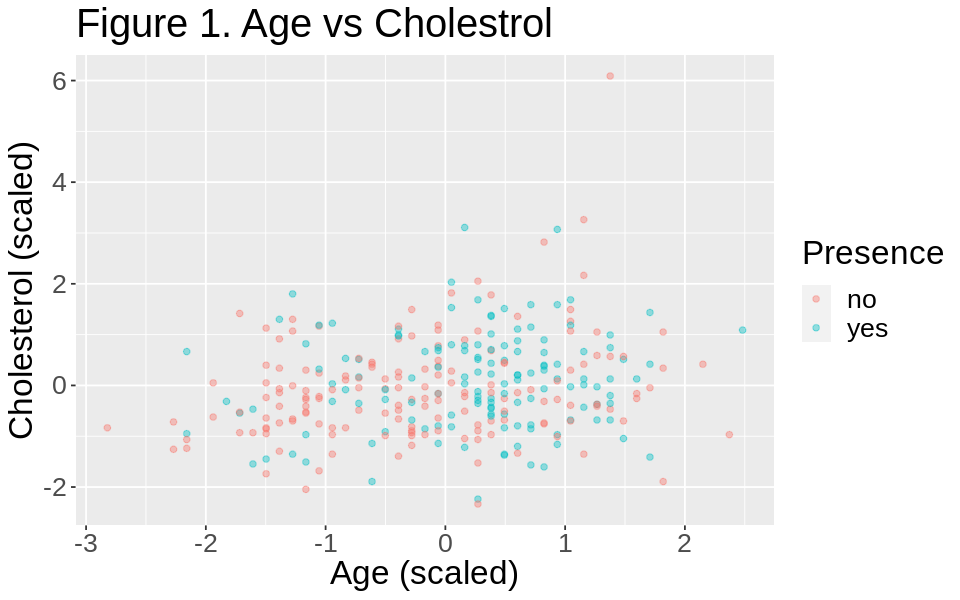

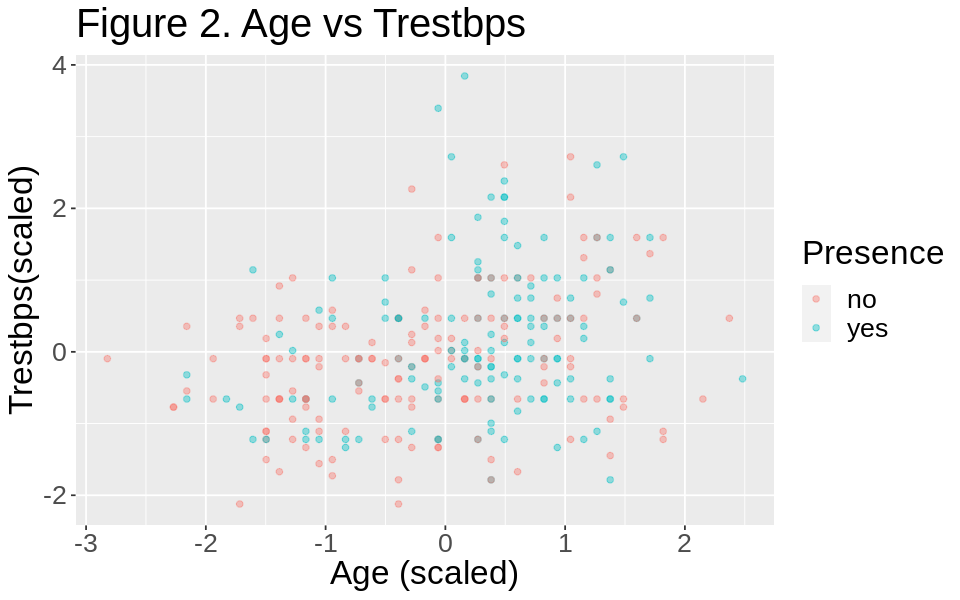

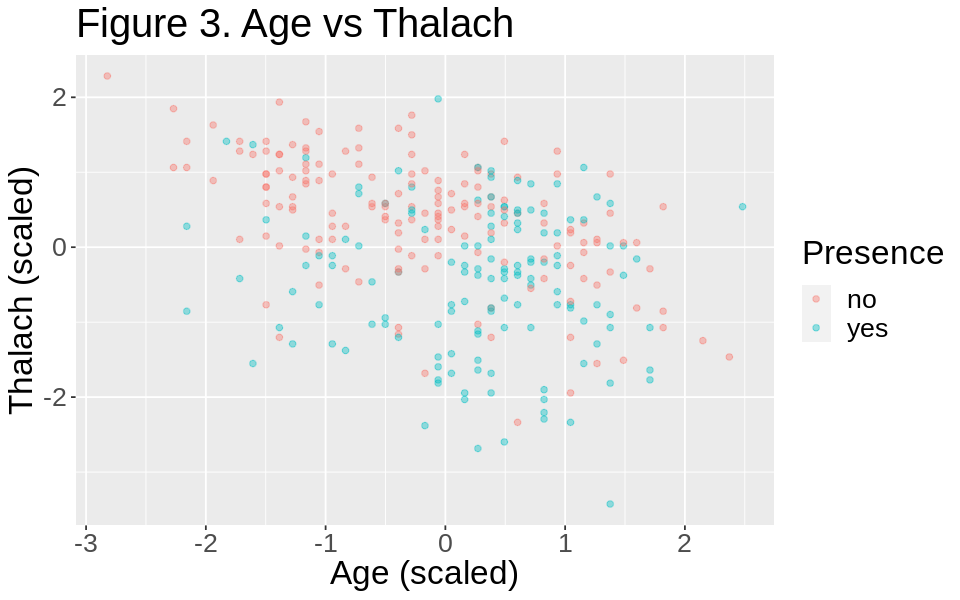

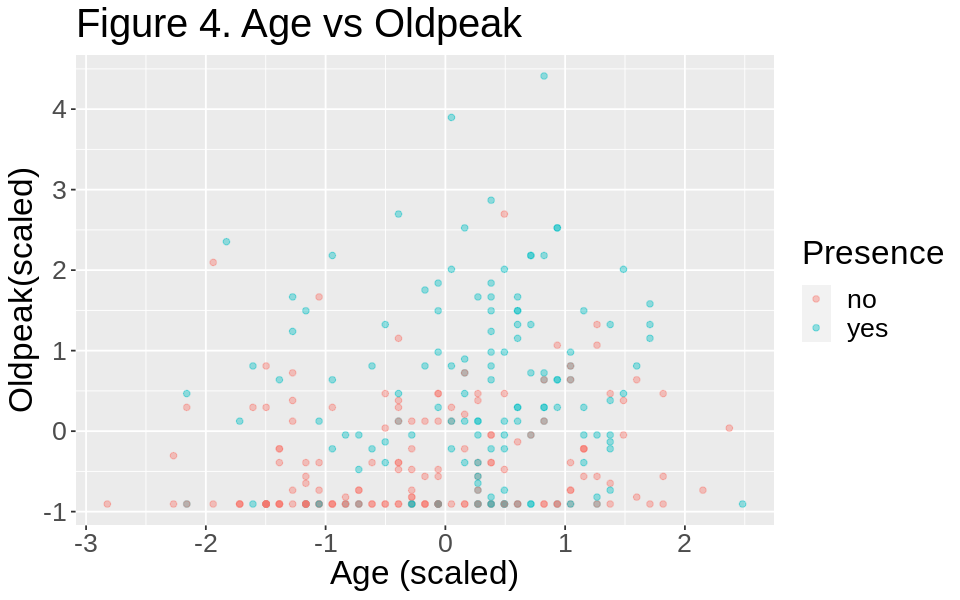

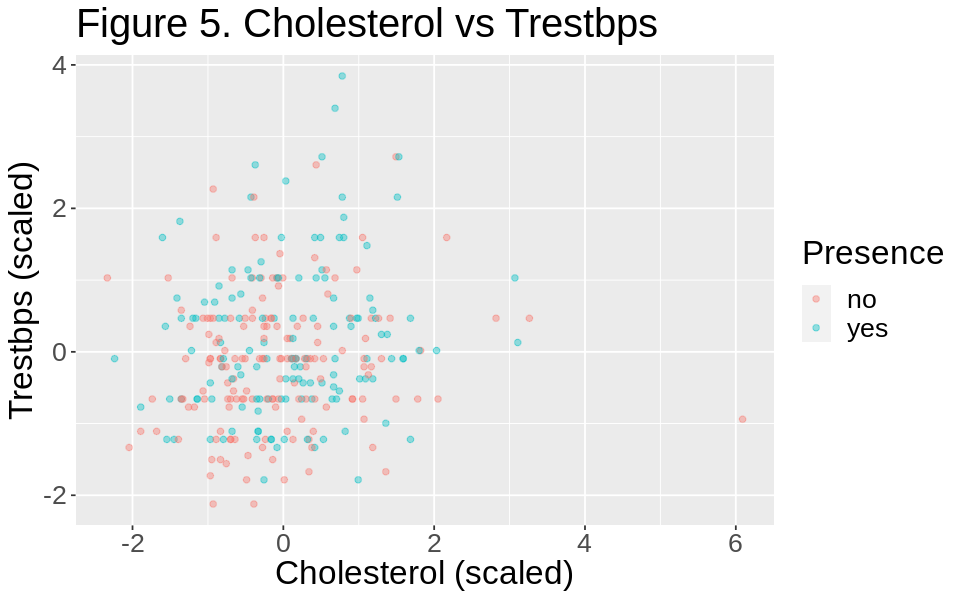

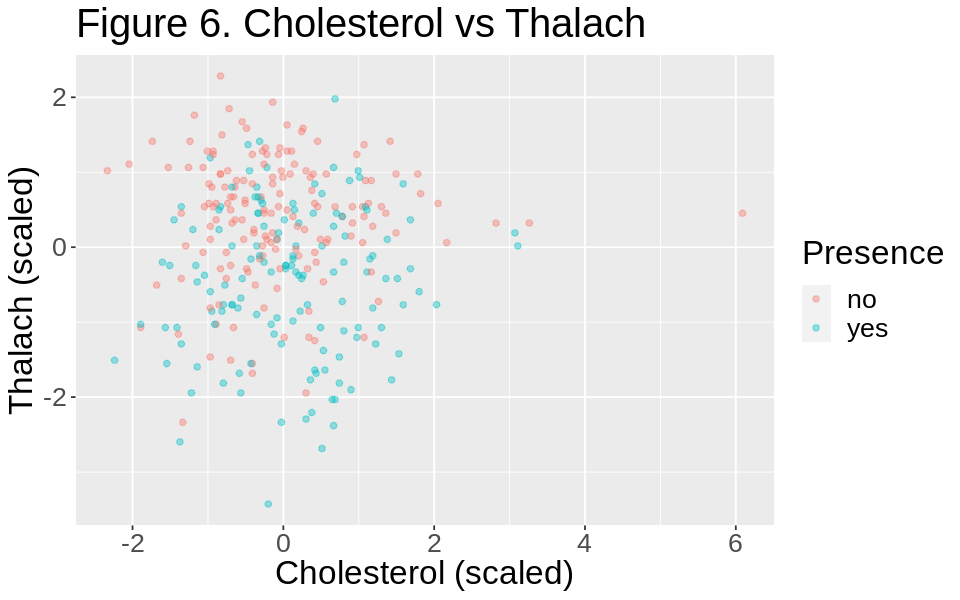

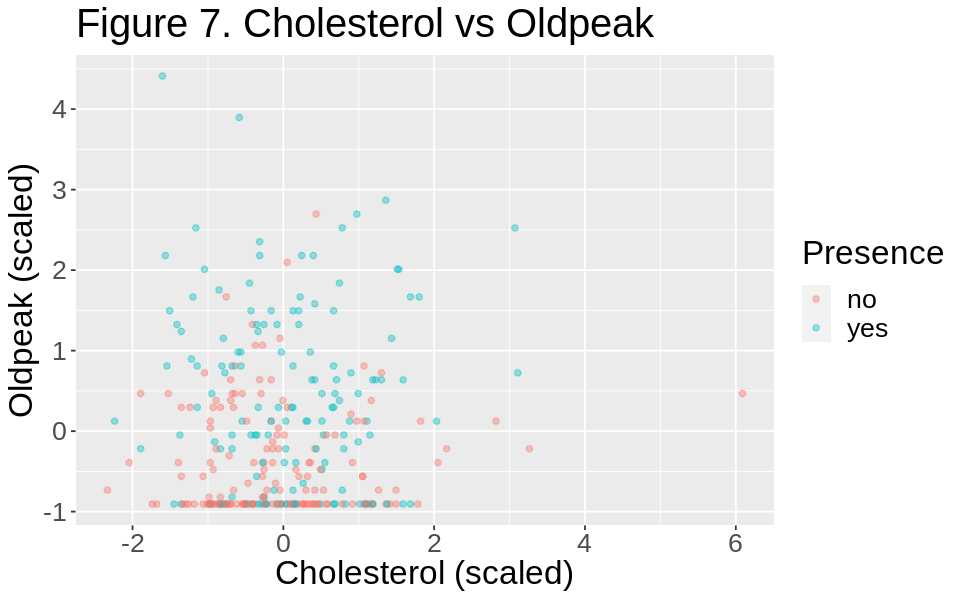

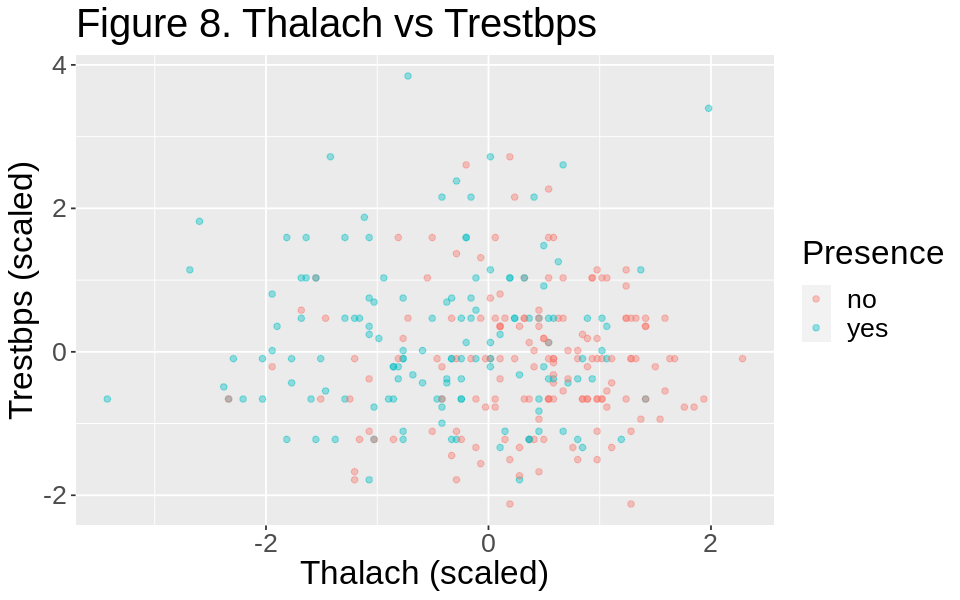

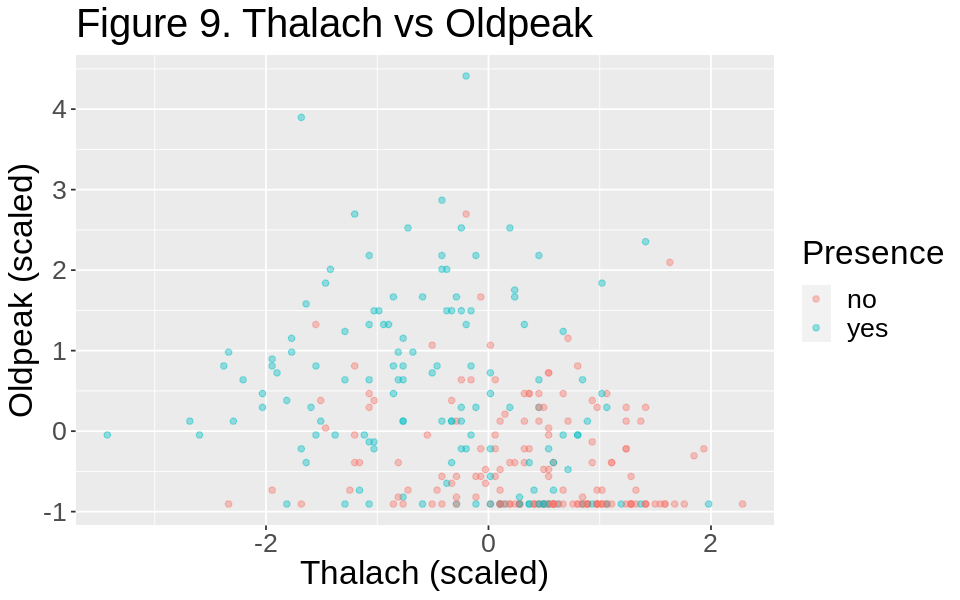

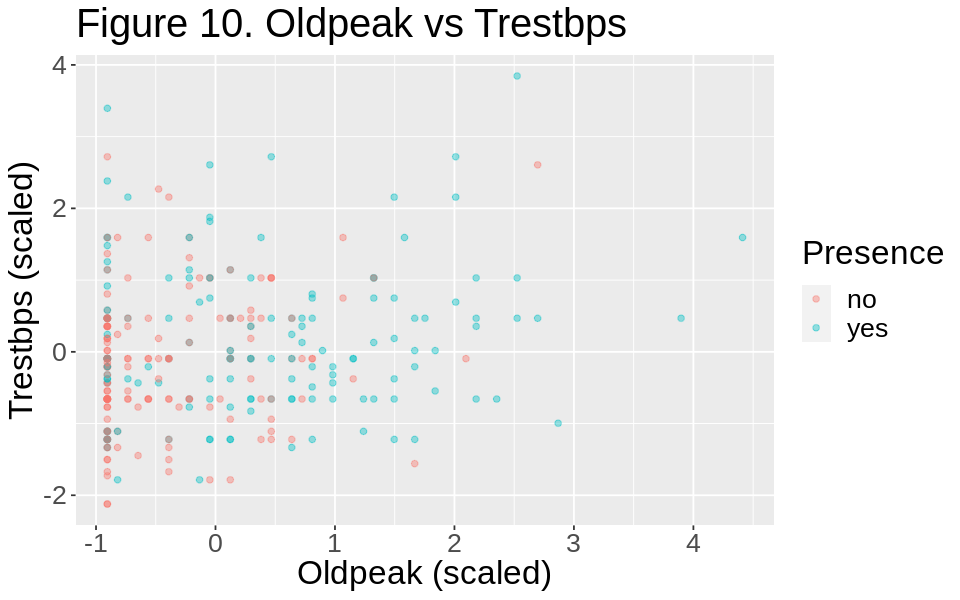

In [33]:
options(repr.plot.width = 8, repr.plot.height = 5)

# scale the variables 
heart_disease_data_scaled <- heart_disease_data %>%
  mutate(age = scale(age), chol = scale(chol), trestbps = scale(trestbps), thalach = scale(thalach), oldpeak = scale(oldpeak))

# 5 variables, 2 each time => 10 scatterplots 

# Age vs Chol
age_chol <- heart_disease_data_scaled %>%
  ggplot(aes(x = age, y = chol, color = presence)) +
  geom_point(alpha = 0.4) +
  labs(x = "Age (scaled)", 
       y = "Cholesterol (scaled)",
       color = "Presence") +
       theme(text = element_text(size = 20)) +
  ggtitle("Figure 1. Age vs Cholestrol")
age_chol

# Age vs Trestbps
age_trestbps <- heart_disease_data_scaled %>%
  ggplot(aes(x = age, y = trestbps, color = presence)) +
  geom_point(alpha = 0.4) +
  labs(x = "Age (scaled)", 
       y = "Trestbps(scaled)",
       color = "Presence") +
       theme(text = element_text(size = 20)) +
  ggtitle("Figure 2. Age vs Trestbps")
age_trestbps

# Age vs Thalach
age_thalach <- heart_disease_data_scaled %>%
  ggplot(aes(x = age, y = thalach, color = presence)) +
  geom_point(alpha = 0.4) +
  labs(x = "Age (scaled)", 
       y = "Thalach (scaled)",
       color = "Presence") +
       theme(text = element_text(size = 20)) +
  ggtitle("Figure 3. Age vs Thalach") 
age_thalach

# Age vs Oldpeak
age_oldpeak <- heart_disease_data_scaled %>%
  ggplot(aes(x = age, y = oldpeak, color = presence)) +
  geom_point(alpha = 0.4) +
  labs(x = "Age (scaled)", 
       y = "Oldpeak(scaled)",
       color = "Presence") +
       theme(text = element_text(size = 20))  +
  ggtitle("Figure 4. Age vs Oldpeak")
age_oldpeak

# Chol vs Trestbps
chol_trestbps <- heart_disease_data_scaled %>%
  ggplot(aes(x = chol, y = trestbps, color = presence)) +
  geom_point(alpha = 0.4) +
  labs(x = "Cholesterol (scaled)", 
       y = "Trestbps (scaled)",
       color = "Presence") +
       theme(text = element_text(size = 20))  +
  ggtitle("Figure 5. Cholesterol vs Trestbps")
chol_trestbps

# Chol vs Thalach
chol_thalach <- heart_disease_data_scaled %>%
  ggplot(aes(x = chol, y = thalach, color = presence)) +
  geom_point(alpha = 0.4) +
  labs(x = "Cholesterol (scaled)", 
       y = "Thalach (scaled)",
       color = "Presence") +
       theme(text = element_text(size = 20))  +
  ggtitle("Figure 6. Cholesterol vs Thalach")
chol_thalach

# Chol vs Oldpeak
chol_oldpeak <- heart_disease_data_scaled %>%
  ggplot(aes(x = chol, y = oldpeak, color = presence)) +
  geom_point(alpha = 0.4) +
  labs(x = "Cholesterol (scaled)", 
       y = "Oldpeak (scaled)",
       color = "Presence") +
       theme(text = element_text(size = 20))  +
  ggtitle("Figure 7. Cholesterol vs Oldpeak")
chol_oldpeak

# Thalach vs Trestbps
thalach_trestbps <- heart_disease_data_scaled %>%
  ggplot(aes(x = thalach, y = trestbps, color = presence)) +
  geom_point(alpha = 0.4) +
  labs(x = "Thalach (scaled)", 
       y = "Trestbps (scaled)",
       color = "Presence") +
       theme(text = element_text(size = 20))  +
  ggtitle("Figure 8. Thalach vs Trestbps")
thalach_trestbps

# Thalach vs Oldpeak
thalach_oldpeak <- heart_disease_data_scaled %>%
  ggplot(aes(x = thalach, y = oldpeak, color = presence)) +
  geom_point(alpha = 0.4) +
  labs(x = "Thalach (scaled)", 
       y = "Oldpeak (scaled)",
       color = "Presence") +
       theme(text = element_text(size = 20))  +
  ggtitle("Figure 9. Thalach vs Oldpeak")
thalach_oldpeak

# Oldpeak vs Trestbps
oldpeak_trestbps <- heart_disease_data_scaled %>%
  ggplot(aes(x = oldpeak, y = trestbps, color = presence)) +
  geom_point(alpha = 0.4) +
  labs(x = "Oldpeak (scaled)", 
       y = "Trestbps (scaled)",
       color = "Presence") +
       theme(text = element_text(size = 20))  +
  ggtitle("Figure 10. Oldpeak vs Trestbps")
oldpeak_trestbps


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



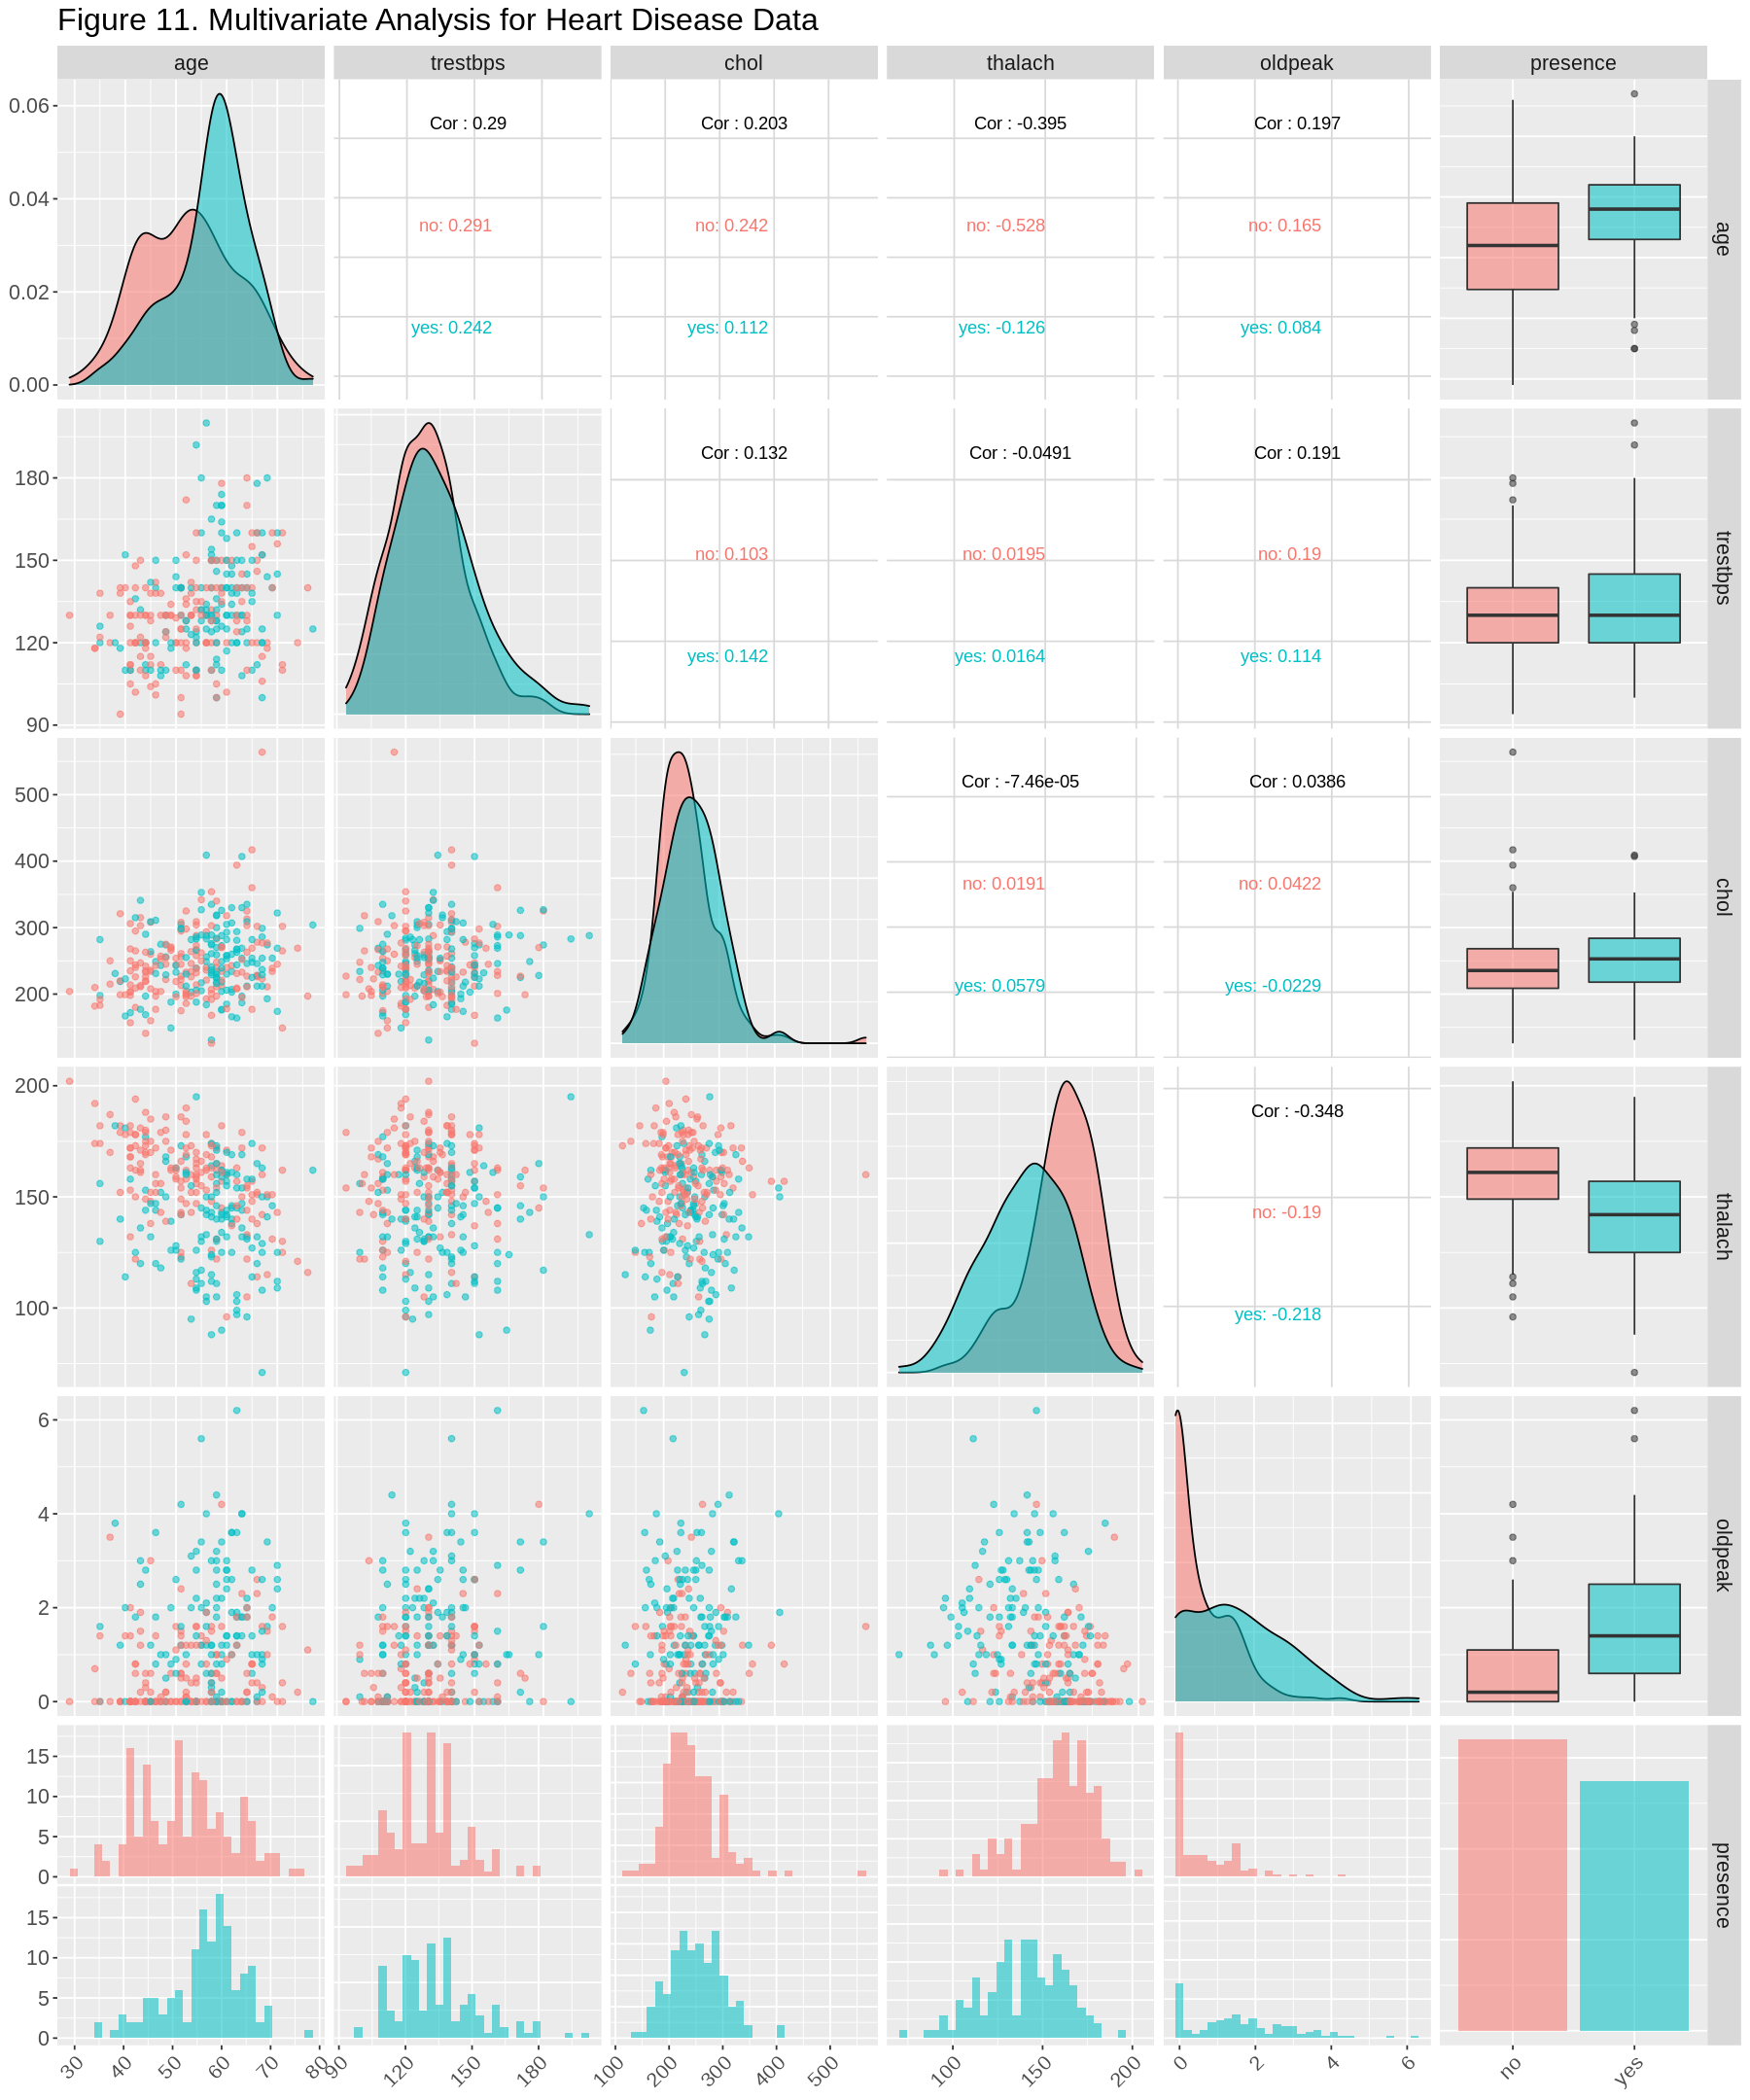

In [34]:
options(repr.plot.width = 15, repr.plot.height = 18)

#scatterplot matrix (ggpairs) with all categorical variables
multivariate_plot <- heart_disease_data %>%
    ggpairs(mapping = ggplot2::aes(colour = presence, alpha = 0.4)) +  
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
    theme(text = element_text(size = 16)) +
    ggtitle("Figure 11. Multivariate Analysis for Heart Disease Data")

multivariate_plot 

### 2.2 Splitting & Summarizing data

We will be partitioning `heart_disease_data` into a training (75%) and testing (25%) set using the `tidymodels` package. We will then find the best k-nn classifier using the training set and evaluate the performance of our model on the test dataset. We will use the variable `presence` as our class label. 

#### Summary Statistics (only using training data)
- Count the number of patients with presence = 0 (heart disease absent), and presence = 1-4 (heart disease present)
- Calculate the summary statistics  mean, median, standard deviation, max, min for the numerical variables age, chol, trestbps.
- No missing data in the dataset.

In [35]:
heart_disease_data_split <- initial_split(heart_disease_data, prop = 3/4, strata = presence)  
heart_disease_data_train <- training(heart_disease_data_split)   
heart_disease_data_test <- testing(heart_disease_data_split)

# heart_disease_data_train
# dim(heart_disease_data_train)

# heart_disease_data_test
# dim(heart_disease_data_test)

count_by_presence <- heart_disease_data_train %>%
                      group_by(presence) %>%
                      summarise(count = n())

count_by_presence 

# select the numerical columns of age, chol, trestbps
heart_disease_data_train_num <- heart_disease_data_train %>% select(-presence)

heart_disease_data_train 

# Data Summary Table

heart_disease_data_mean <- heart_disease_data_train_num %>% summarize(across(age:oldpeak, mean))
heart_disease_data_median <- heart_disease_data_train_num %>% summarize(across(age:oldpeak, median))
heart_disease_data_max <- heart_disease_data_train_num %>% summarize(across(age:oldpeak, max))
heart_disease_data_min <- heart_disease_data_train_num %>% summarize(across(age:oldpeak, min))
heart_disease_data_sd <- heart_disease_data_train_num %>% summarize(across(age:oldpeak, sd))
    
heart_disease_data_max = heart_disease_data_max %>%
    pivot_longer(
        cols = age:oldpeak,
        names_to = "variable",
        values_to = "max"
    )

heart_disease_data_min = heart_disease_data_min %>%
    pivot_longer(
        cols = age:oldpeak,
        names_to = "variable",
        values_to = "min"
    )

heart_disease_data_mean = heart_disease_data_mean %>%
    pivot_longer(
        cols = age:oldpeak,
        names_to = "variable",
        values_to = "mean"
    )

heart_disease_data_median = heart_disease_data_median %>%
    pivot_longer(
        cols = age:oldpeak,
        names_to = "variable",
        values_to = "median"
    )

heart_disease_data_sd = heart_disease_data_sd %>%
    pivot_longer(
        cols = age:oldpeak,
        names_to = "variable",
        values_to = "standard_deviation"
    )

heart_disease_data_table <- merge(heart_disease_data_max, heart_disease_data_min, by = 'variable') %>% 
                            merge(heart_disease_data_mean, by = 'variable') %>% 
                            merge(heart_disease_data_median,by = 'variable') %>%
                            merge(heart_disease_data_sd, by = 'variable')
heart_disease_data_table


`summarise()` ungrouping output (override with `.groups` argument)



presence,count
<fct>,<int>
no,120
yes,103


age,trestbps,chol,thalach,oldpeak,presence
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
54,108,309,156,0.0,no
51,94,227,154,0.0,no
67,106,223,142,0.3,no
51,130,305,142,1.2,yes
71,112,149,125,1.6,no
63,124,197,136,0.0,yes
62,124,209,163,0.0,no
56,130,256,142,0.6,yes
60,102,318,160,0.0,no


variable,max,min,mean,median,standard_deviation
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,77.0,29,54.6771300,56.0,9.024180
chol,564.0,126,249.3183857,245.0,52.203793
oldpeak,6.2,0,0.9856502,0.6,1.157572
thalach,202.0,71,149.8206278,155.0,23.465023
trestbps,200.0,94,131.0672646,130.0,18.426380


### 2.3 Visualization (using training data)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



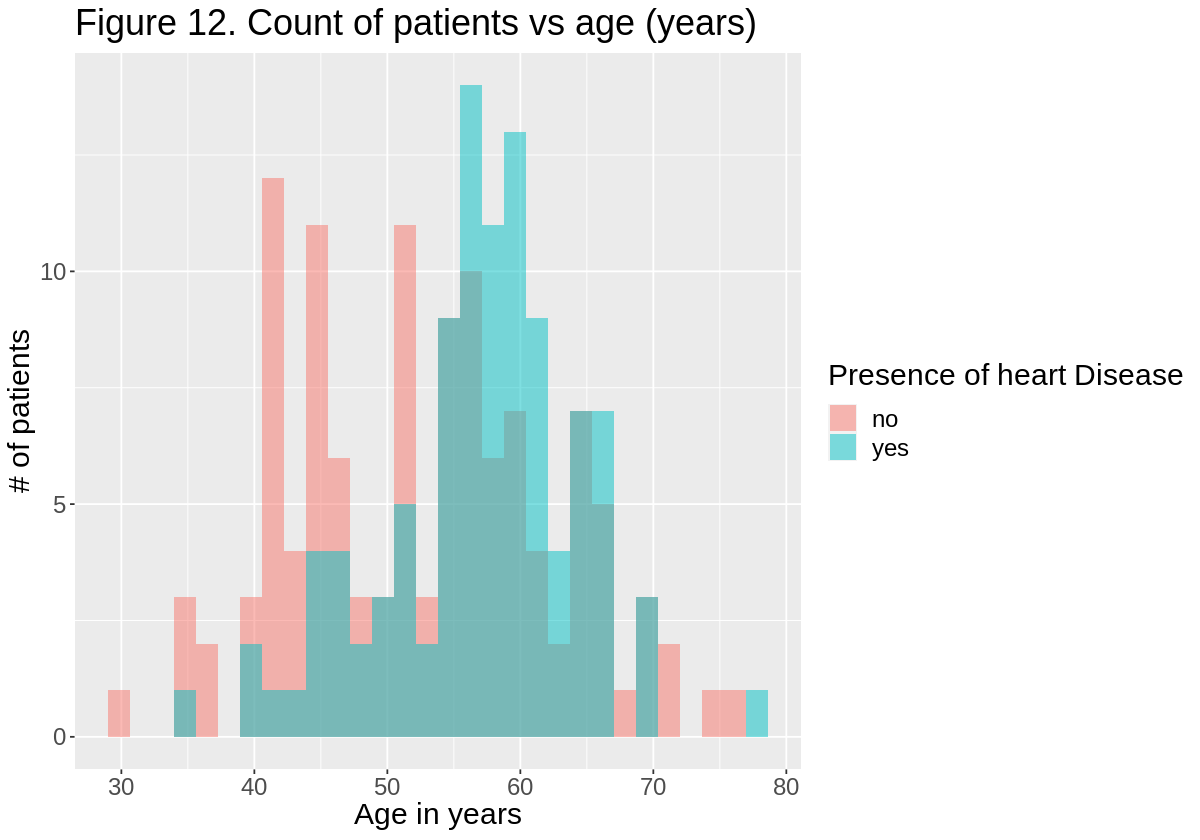

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



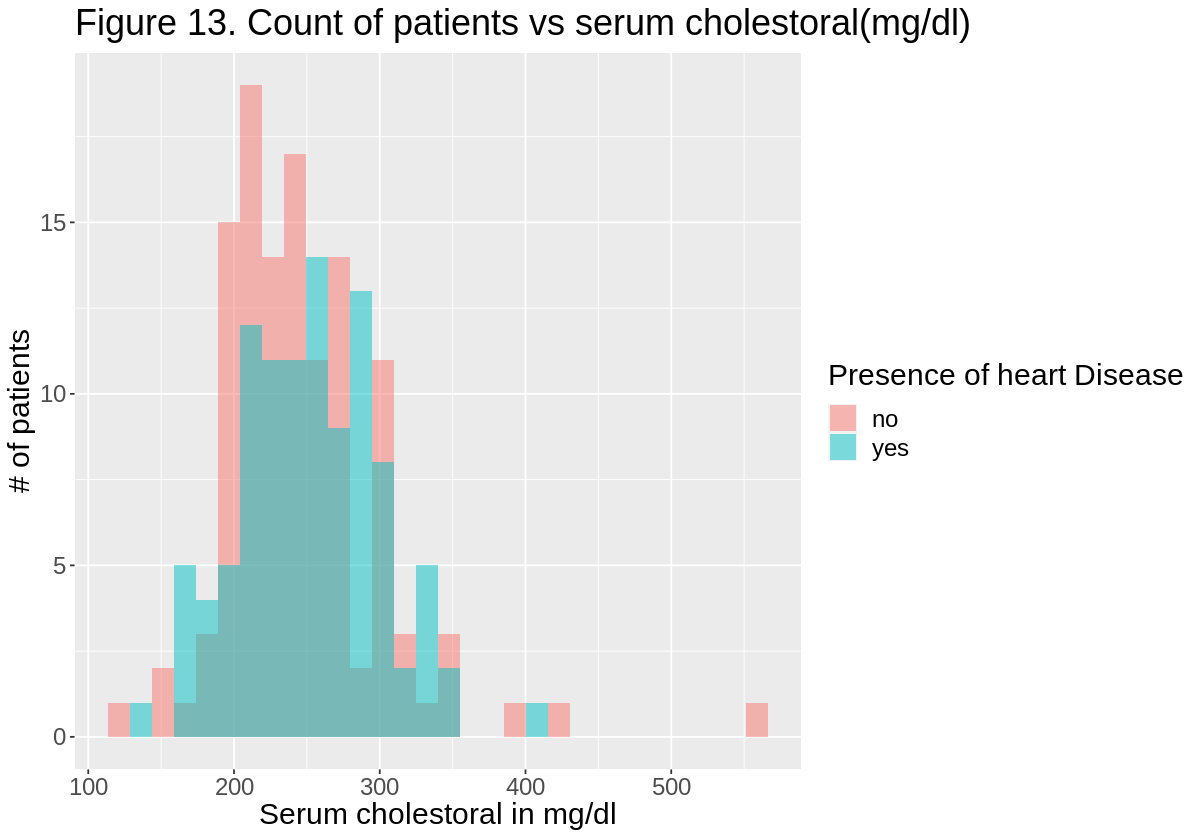

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



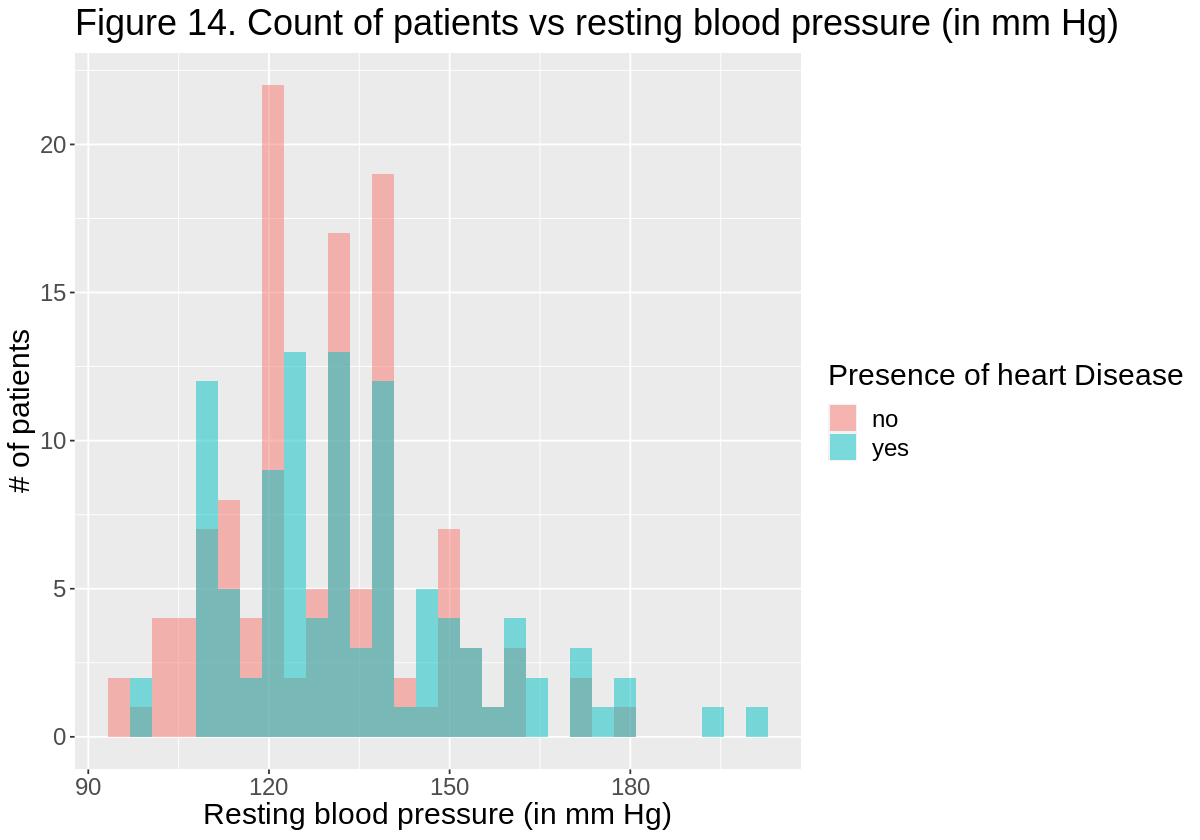

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



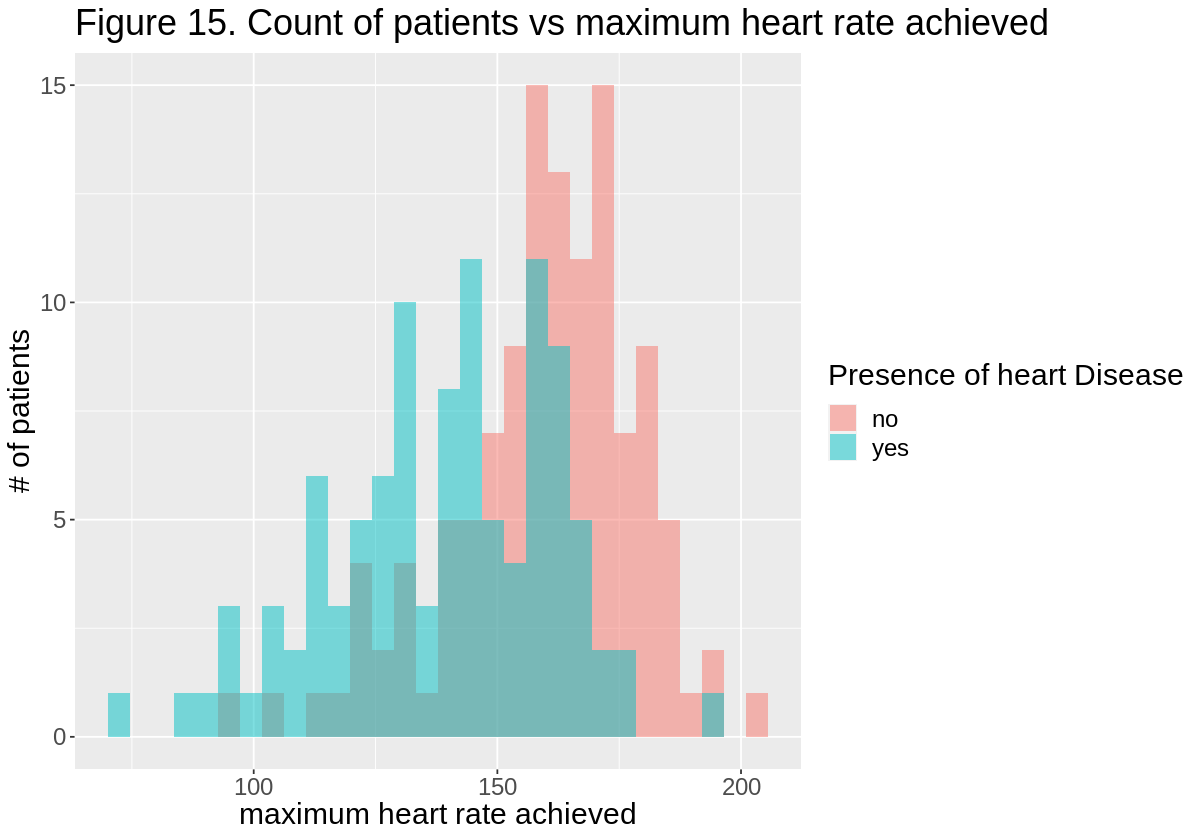

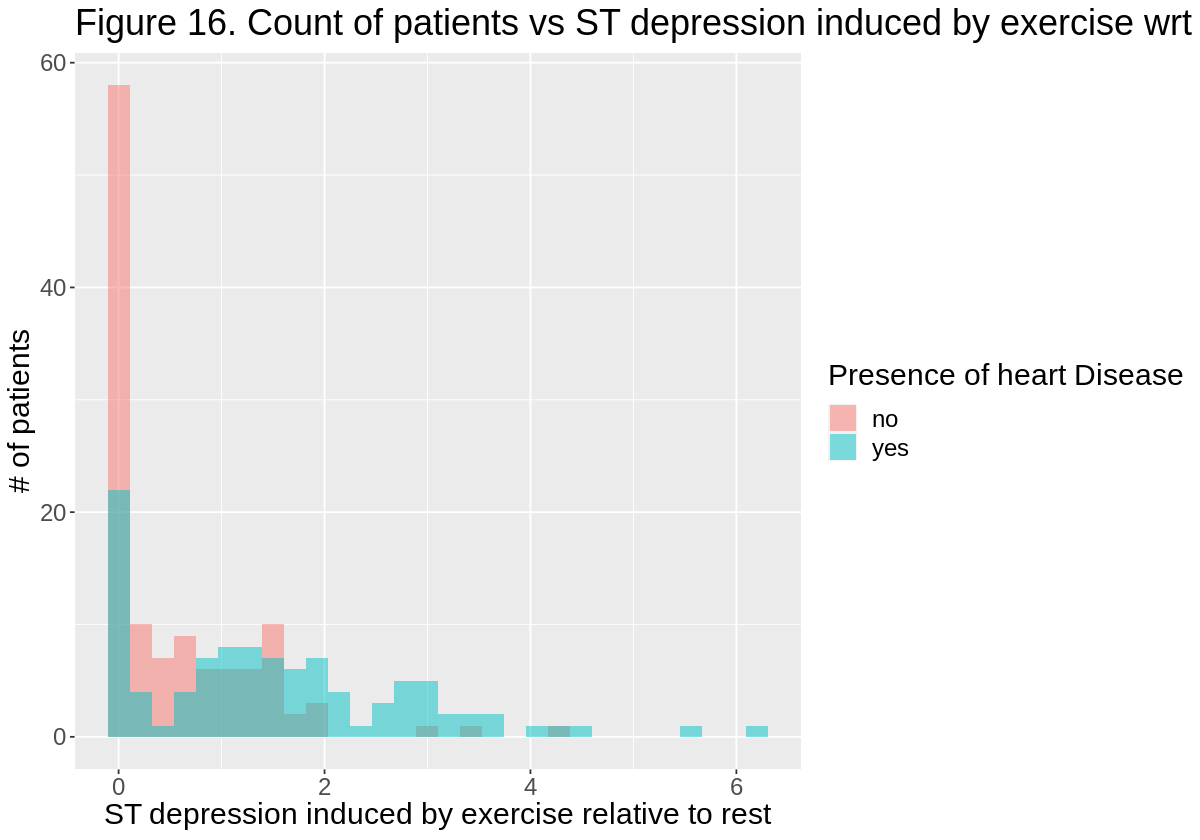

In [36]:
options(repr.plot.width = 10, repr.plot.height = 7)

# Presence/absence based on age
heart_disease_data_train_age_plot <- ggplot(heart_disease_data_train, aes(x = age)) +
                                    geom_histogram(aes(fill = presence), alpha = 0.5, position="identity") +
                                    labs(x = "Age in years", y = "# of patients", fill = "Presence of heart Disease") +
                                    theme(text = element_text(size = 18)) +
                                    ggtitle("Figure 12. Count of patients vs age (years)")
heart_disease_data_train_age_plot

# Presence/absence based on cholestrol
heart_disease_data_train_chol_plot <- ggplot(heart_disease_data_train, aes(x = chol)) +
                                    geom_histogram(aes(fill = presence), alpha = 0.5, position="identity") +
                                    labs(x = "Serum cholestoral in mg/dl", y = "# of patients", fill = "Presence of heart Disease") +
                                    theme(text = element_text(size = 18)) +
                                    ggtitle("Figure 13. Count of patients vs serum cholestoral(mg/dl)")
heart_disease_data_train_chol_plot


# Presence/absence based on resting blood pressure
heart_disease_data_train_trestbps_plot <- ggplot(heart_disease_data_train, aes(x = trestbps)) +
                                    geom_histogram(aes(fill = presence), alpha = 0.5, position="identity") +
                                    labs(x = "Resting blood pressure (in mm Hg)", y = "# of patients", fill = "Presence of heart Disease") +
                                    theme(text = element_text(size = 18)) +
                                    ggtitle("Figure 14. Count of patients vs resting blood pressure (in mm Hg)")
heart_disease_data_train_trestbps_plot

# Presence/absence based on maximum heart rate achieved
heart_disease_data_train_thalach_plot <- ggplot(heart_disease_data_train, aes(x = thalach)) +
                                    geom_histogram(aes(fill = presence), alpha = 0.5, position="identity") +
                                    labs(x = "maximum heart rate achieved", y = "# of patients", fill = "Presence of heart Disease") +
                                    theme(text = element_text(size = 18)) +
                                    ggtitle("Figure 15. Count of patients vs maximum heart rate achieved")
heart_disease_data_train_thalach_plot

# Presence/absence based on ST depression induced by exercise relative to rest
heart_disease_data_train_oldpeak_plot <- ggplot(heart_disease_data_train, aes(x = oldpeak)) +
                                    geom_histogram(aes(fill = presence), alpha = 0.5, position="identity") +
                                    labs(x = "ST depression induced by exercise relative to rest", y = "# of patients", fill = "Presence of heart Disease") +
                                    theme(text = element_text(size = 18)) +
                                    ggtitle("Figure 16. Count of patients vs ST depression induced by exercise wrt rest")
heart_disease_data_train_oldpeak_plot

## 3. Methods

### 3.1 Analysis and Variables
Many physiological attributes have been shown through studies and reports by the CDC and WHO to have strong links to heart disease. After filtering out categorical variables and examining the data using `ggpairs`, we have chosen the three most relevant out of the five numerical values in our dataset to analyze: `thalach` (maximum heart rate achieved), `oldpeak` (ST depression induced by exercise relative to rest), and `age` (age in years). Using our chosen variables, we will construct and test a classifier using the KNN classification model and choose an appropriate k using cross-validation.

### 3.2 Visualization of Results
We will visualize results of our classification using different plots to indicate the relationships among all of the variables. This includes plotting each predictor against each other and colouring based on presence to show the relationship and line graphs to determine what number of k neighbours we will use.

## 4. Classification
### 4.1 Creating the model and recipe

In [37]:
#Creating model and recipe

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")


hd_recipe <- recipe(presence ~ age + oldpeak + thalach, data = heart_disease_data_train) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors())

hd_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

### 4.2 Performing cross-validation and determining which k to use

Finding the best K for KNN by varying K from 1 to 125 in increments of 2 and running a 5-fold cross validation. We will then filter the maximum accuracy neighbour and see if it is the righ K to choose using the plot below.

In [38]:
set.seed(999)
hd_vfold <- vfold_cv(heart_disease_data_train, v = 5, strata = presence)

k_vals <- tibble(neighbors = seq(from = 1, to = 125, by = 2))

# workflow 
knn_results <- workflow() %>%
                 add_recipe(hd_recipe) %>%
                 add_model(knn_spec) %>%
                 tune_grid(resamples = hd_vfold, grid = k_vals) %>%
                 collect_metrics()

## accuracies for all the neighbours of k =1 to k = 125 in increments of 2
accuracies <- knn_results %>%
                 filter(.metric == "accuracy")
accuracies

## maximum accuracy 
max_accuracy <- accuracies %>%
                    filter(mean == max(mean))
max_accuracy

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6546465,5,0.006111737,Model01
3,accuracy,binary,0.6948485,5,0.023877942,Model02
5,accuracy,binary,0.7174747,5,0.013508189,Model03
7,accuracy,binary,0.7397980,5,0.006527472,Model04
9,accuracy,binary,0.7486869,5,0.012022536,Model05
11,accuracy,binary,0.7082828,5,0.018433721,Model06
13,accuracy,binary,0.7217172,5,0.022899460,Model07
15,accuracy,binary,0.7308081,5,0.010758880,Model08
17,accuracy,binary,0.7312121,5,0.017679942,Model09


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
21,accuracy,binary,0.7532323,5,0.01633868,Model11


### Plot of K vs Accuracy to choose the most optimal K value 

As we can see from above we get the maximum accuracy at k = 21. We will examine the plot below to determine the most optimal K.

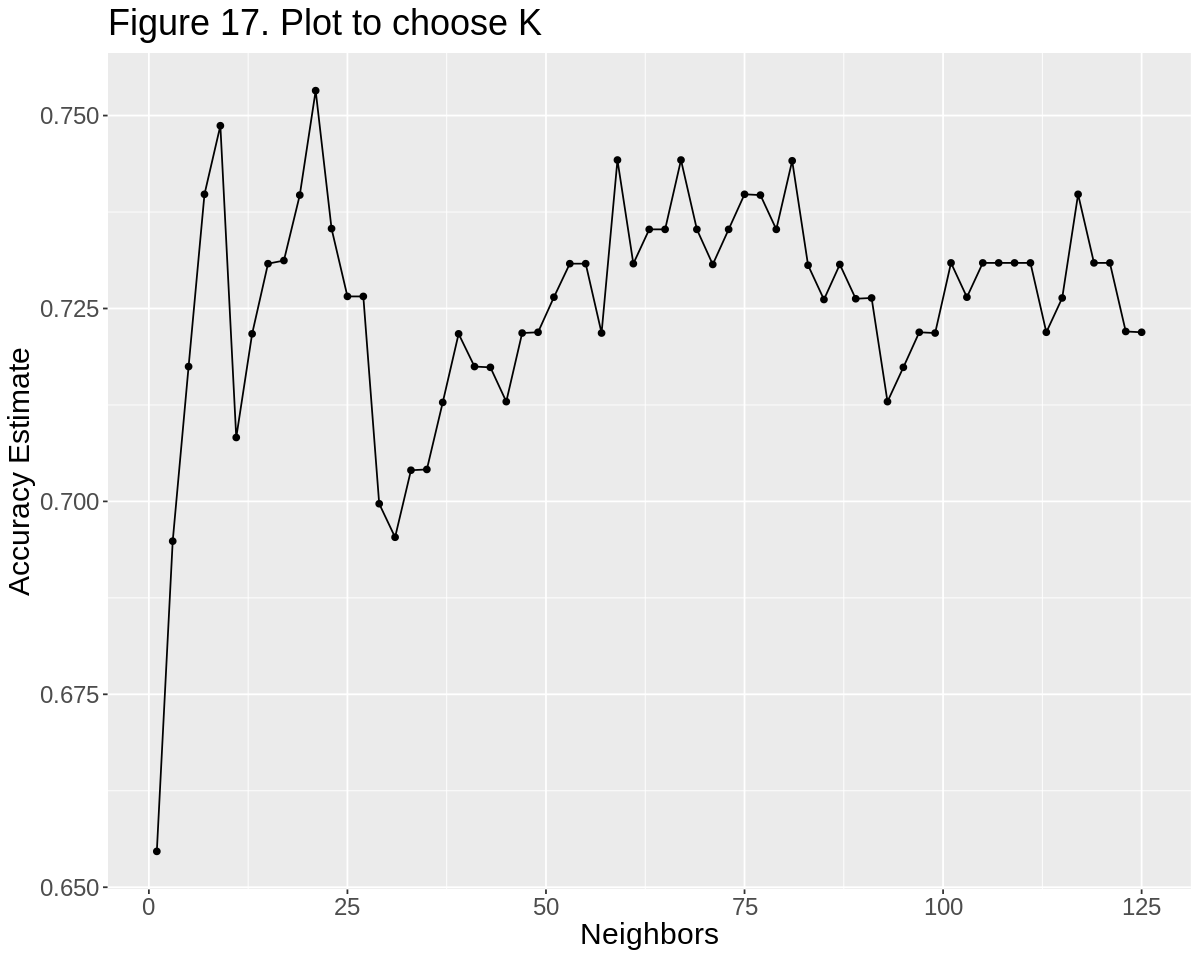

In [45]:
options(repr.plot.width = 10, repr.plot.height = 8)

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 18)) +
                  ggtitle("Figure 17. Plot to choose K")
cross_val_plot

From the plot above, we see that the plot seems to oscillate a lot as the number of neighbors increases. This is likely because the dataset is small (only ~300 rows of data) which is why the model is trying to gather as much information possible by having more neighbors. However we notice that k = 21 is the optimal choice of K since it gives us the maximum accuracy and is also a reasonably right number of neighbors to avoid underfitting or overfitting. Cost of training will not be very expensive either since k is not too large but optimal.

In [46]:
# spec with num of neighbors = 21
knn_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) %>%
  set_engine("kknn") %>%
  set_mode("classification")

hd_fit <- workflow () %>%
                  add_recipe(hd_recipe) %>%
                  add_model(knn_spec2) %>% 
                  fit(data = heart_disease_data_train)
hd_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~21, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2735426
Best kernel: rectangular
Best k: 21

In [47]:
hd_test_predictions <- predict(hd_fit, heart_disease_data_test) %>%
  bind_cols(heart_disease_data_test)

hd_metrics <- hd_test_predictions %>% 
                metrics(truth = presence, estimate = .pred_class) %>%
                filter(.metric == "accuracy")

hd_conf_mat <- hd_test_predictions %>%
                        conf_mat(truth = presence, estimate = .pred_class) 

hd_metrics
hd_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7702703


          Truth
Prediction no yes
       no  32   9
       yes  8  25

## Comparing presence to predictions

In the following graphs, we look at the actual presence values on the left plots, and the predicted presence values on the right plots. These are scatterplots between 2 attributes at a time from the 3 attributes - age, thalach, oldpeak, we used in our classification model.

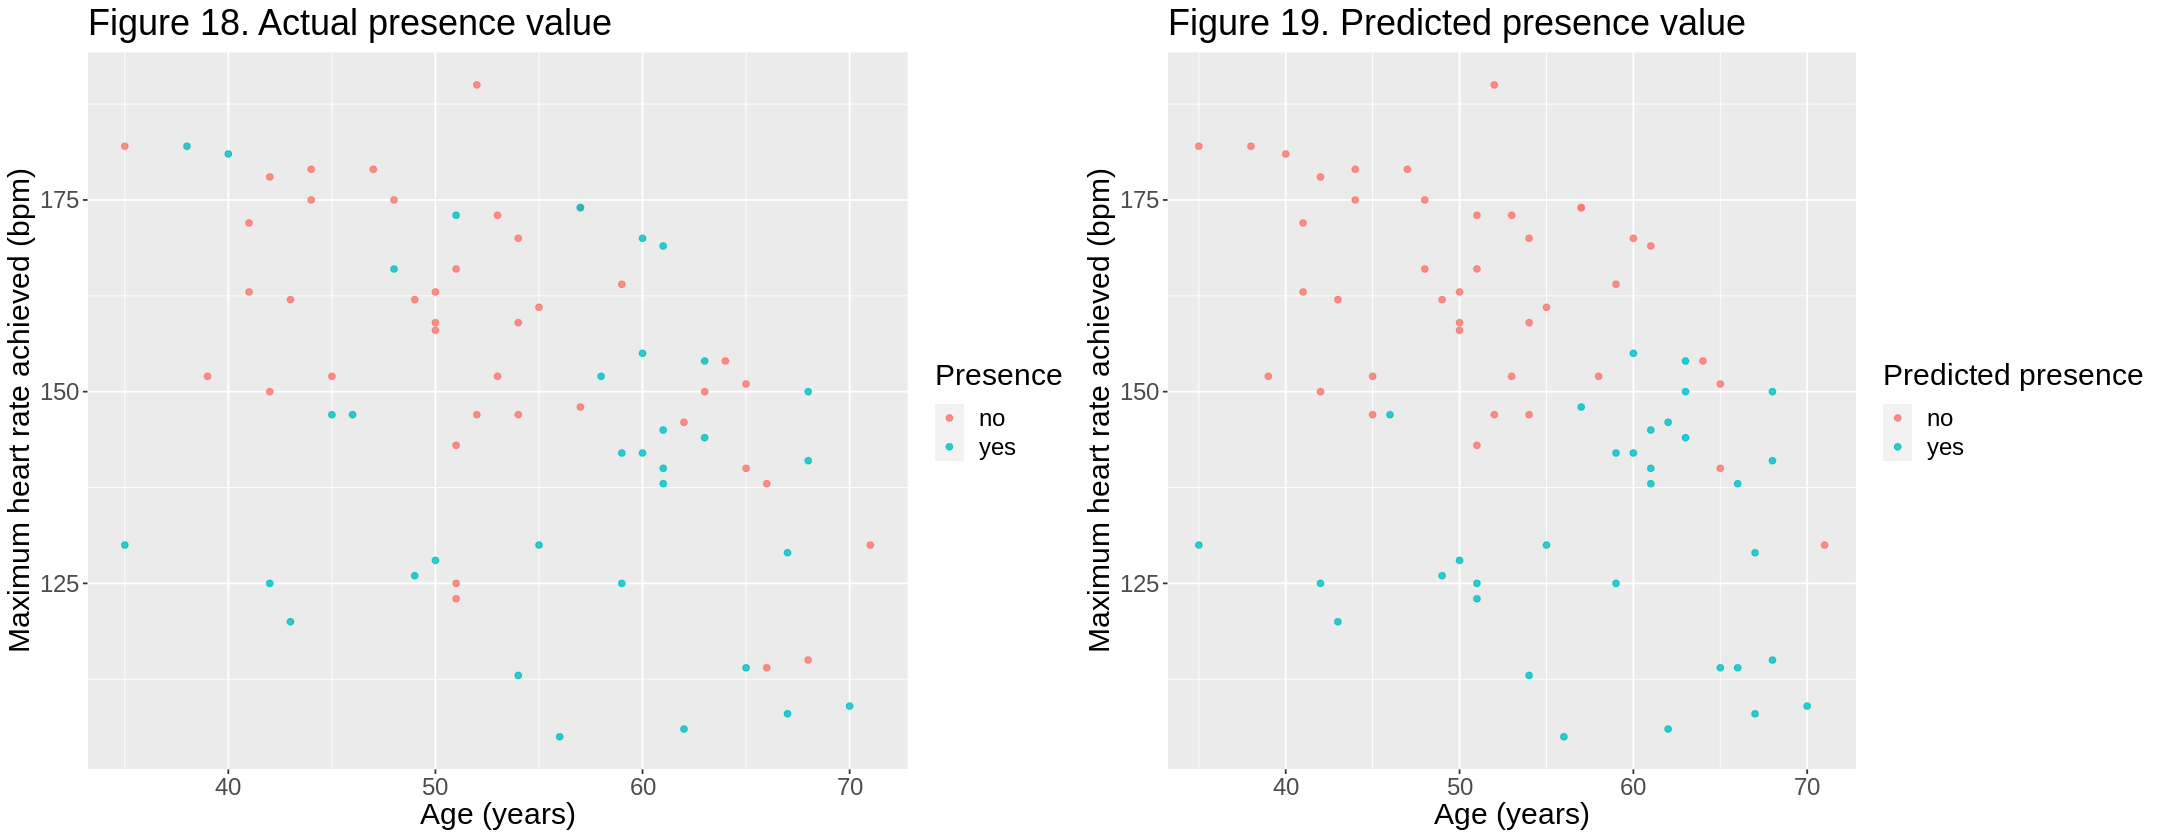

In [62]:
library(cowplot)
options(repr.plot.width = 18, repr.plot.height = 7)

age_thalach_plot <- ggplot(hd_test_predictions, aes(x = age, y = thalach, color = presence)) +
            geom_point(alpha = 0.8) +
            labs(x = "Age (years)", y = "Maximum heart rate achieved (bpm)", colour = "Presence") + 
            theme(text = element_text(size = 18)) +
            ggtitle("Figure 18. Actual presence value")


age_thalach_preds <- ggplot(hd_test_predictions, aes(x = age, y = thalach, color = .pred_class)) +
            geom_point(alpha = 0.8) +
            labs(x = "Age (years)", y = "Maximum heart rate achieved (bpm)", colour = "Predicted presence") + 
            theme(text = element_text(size = 18)) +
            ggtitle("Figure 19. Predicted presence value")

plot_grid(age_thalach_plot, age_thalach_preds)

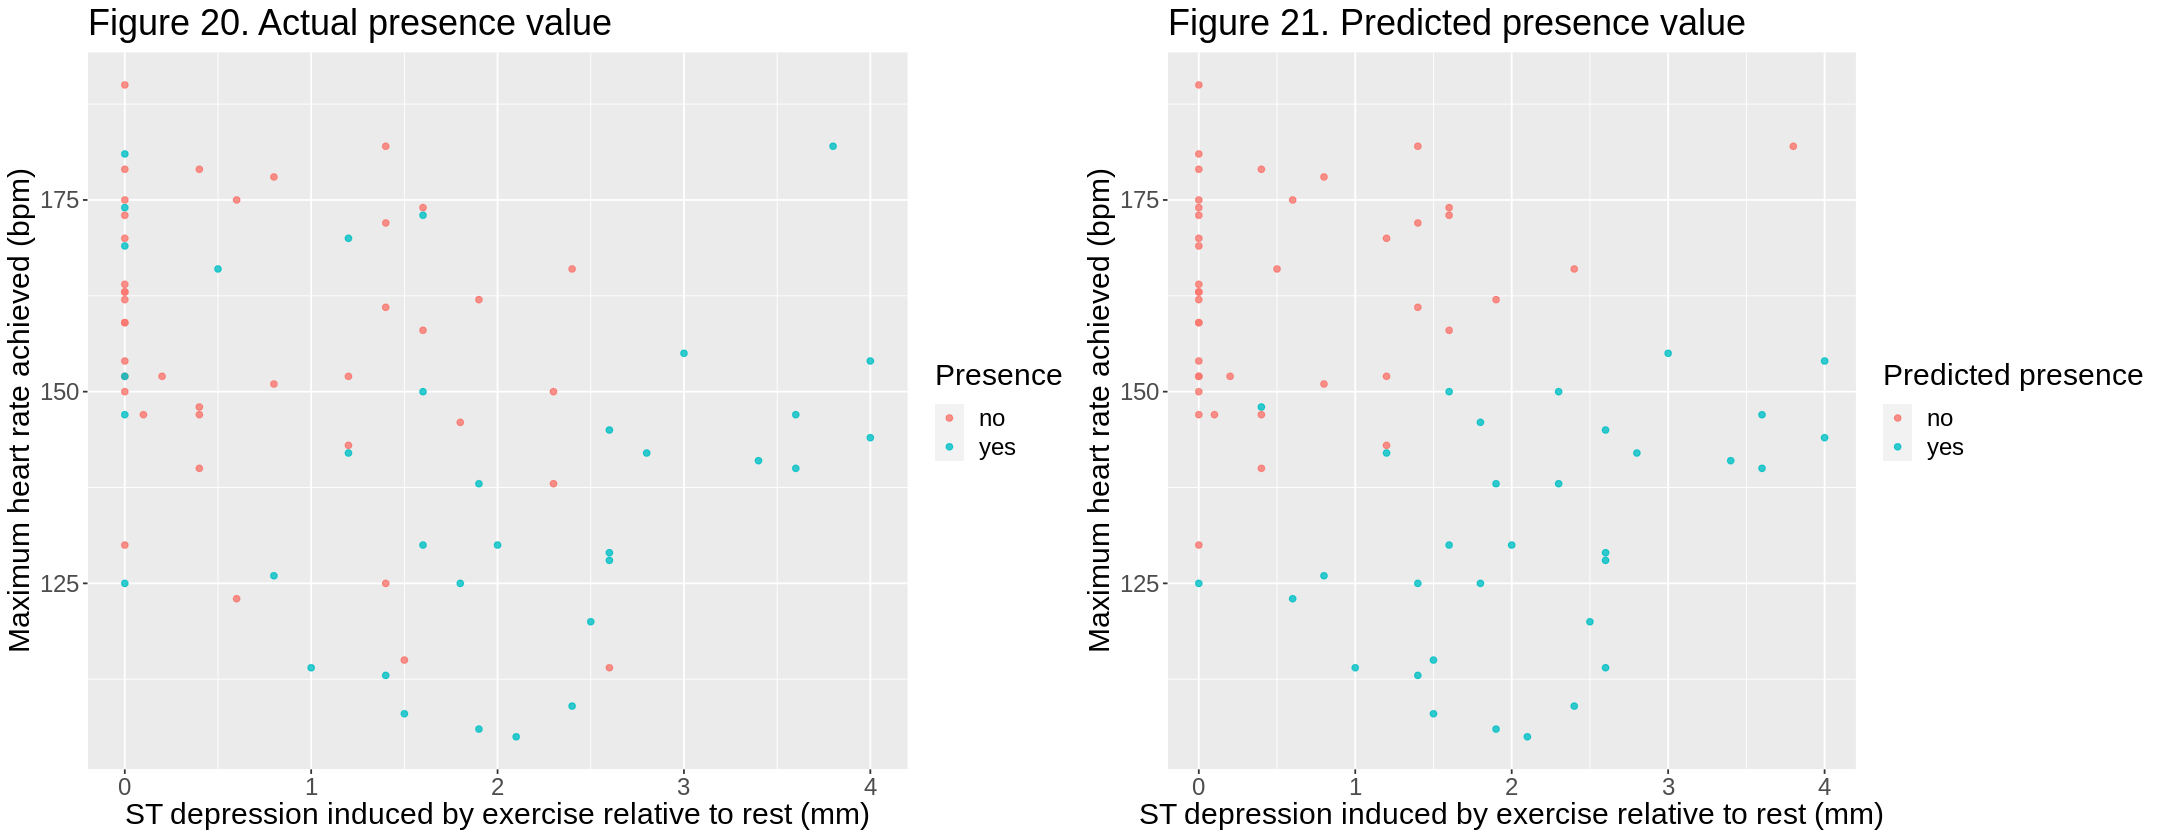

In [63]:
options(repr.plot.width = 18, repr.plot.height = 7)

oldpeak_thalach_plot <- ggplot(hd_test_predictions, aes(x = oldpeak, y = thalach, color = presence)) +
            geom_point(alpha = 0.8) +
            labs(x = "ST depression induced by exercise relative to rest (mm)", y = "Maximum heart rate achieved (bpm)", colour = "Presence") + 
            theme(text = element_text(size = 18)) +
            ggtitle("Figure 20. Actual presence value")

oldpeak_thalach_preds <- ggplot(hd_test_predictions, aes(x = oldpeak, y = thalach, color = .pred_class)) +
            geom_point(alpha = 0.8) +
            labs(x = "ST depression induced by exercise relative to rest (mm)", y = "Maximum heart rate achieved (bpm)", colour = "Predicted presence") + 
            theme(text = element_text(size = 18)) +
            ggtitle("Figure 21. Predicted presence value")
plot_grid(oldpeak_thalach_plot, oldpeak_thalach_preds)

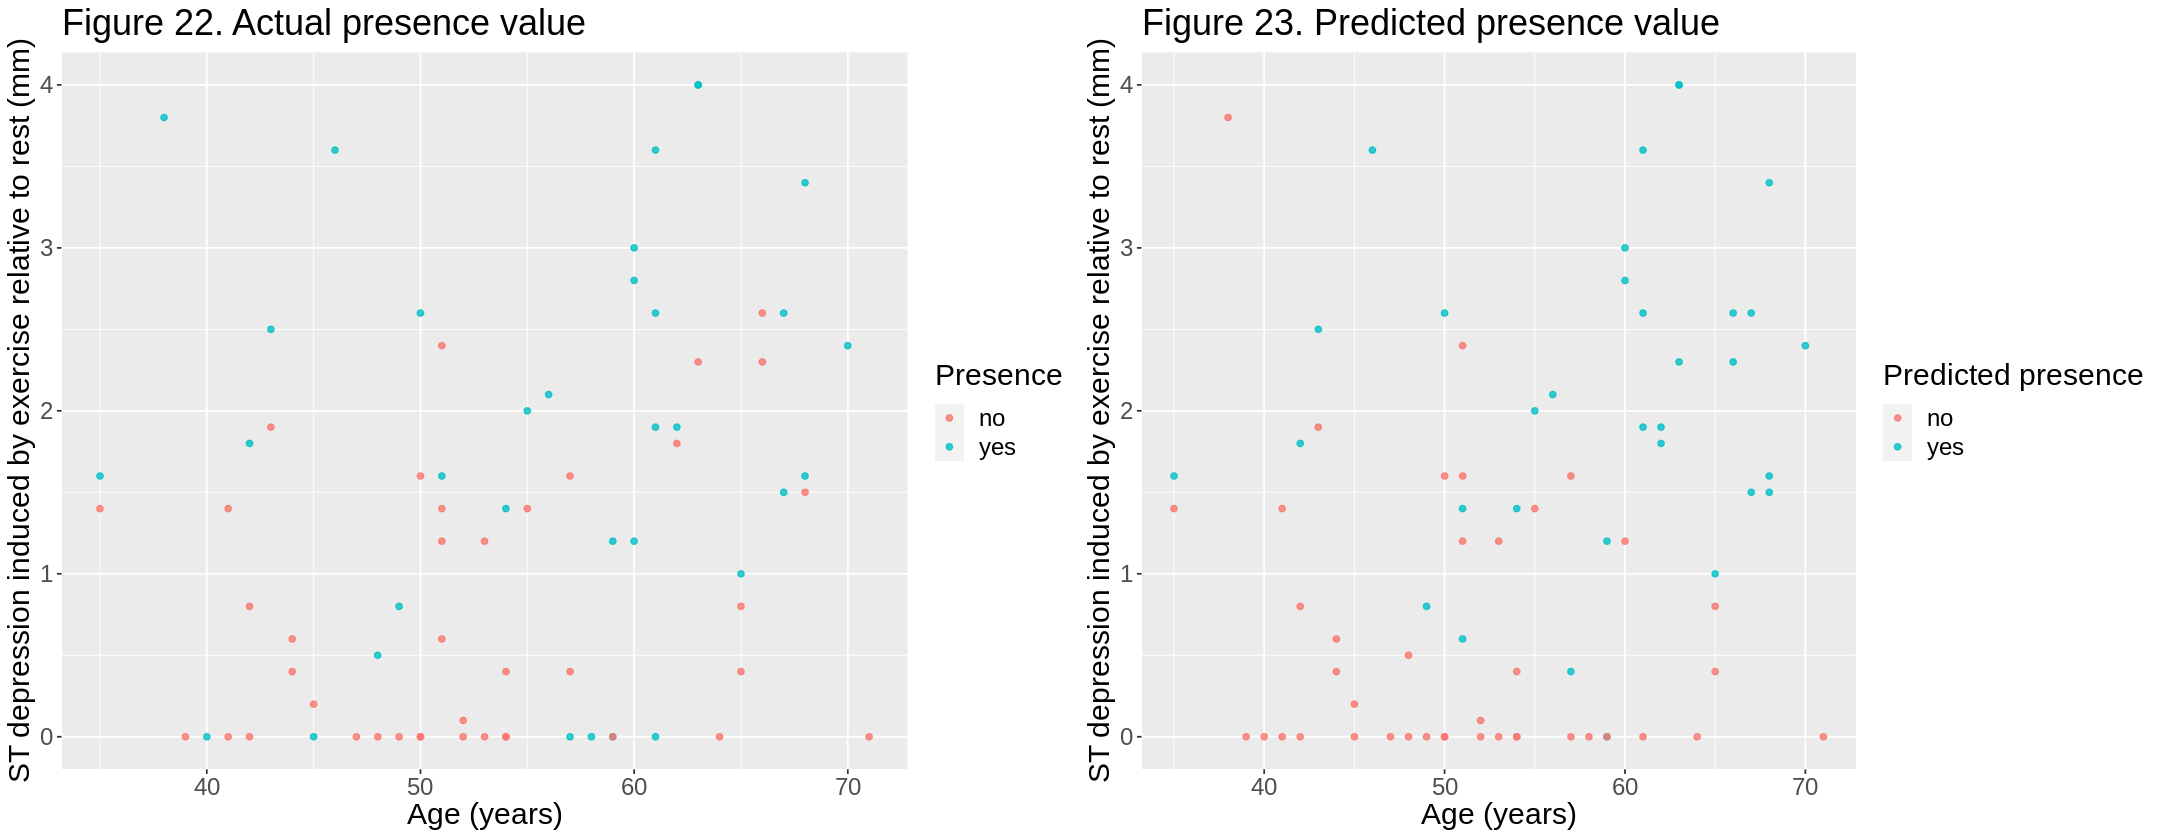

In [64]:

options(repr.plot.width = 18, repr.plot.height = 7)

age_oldpeak_plot <- ggplot(hd_test_predictions, aes(x = age, y = oldpeak, color = presence)) +
            geom_point(alpha = 0.8) +
            labs(x = "Age (years)", y = "ST depression induced by exercise relative to rest (mm)", colour = "Presence") + 
            theme(text = element_text(size = 18)) +
            ggtitle("Figure 22. Actual presence value")

age_oldpeak_preds <- ggplot(hd_test_predictions, aes(x = age, y = oldpeak, color = .pred_class)) +
            geom_point(alpha = 0.8) +
            labs(x = "Age (years)", y = "ST depression induced by exercise relative to rest (mm)", colour = "Predicted presence") + 
            theme(text = element_text(size = 18)) +
            ggtitle("Figure 23. Predicted presence value")

plot_grid(age_oldpeak_plot, age_oldpeak_preds)

## 5. Discussion

### 5.1 Findings
Our classification model with 3 predictors (age, thalach, oldpeak) can predict with about 77% accuracy whether heart disease will be present or absent in a (new, unseen) patient. 

### 5.2 Expectations 
We had expected to be able to find an even higher accuracy model as this model will be used to classify the presence or absense of heart disease in a patient. For such a domain we would like to have an insanely high accuracy to avoid false negatives where someone is classified as having absence of heart disease when they could have it and would have needed treatment. 

### 5.2 Possible Impacts
- Using our model, patients can be classified as high or low risk for heart disease using their age (`age`), maximum heart rate achieved (`thalach`), and ST depresssion induced by exercise wrt rest (`oldpeak`).
- Early diagnosis of heart disease based on this classification can help save more lives by allowing patients to make lifestyle adjustments or seek medical assistance sooner.


### 5.3 Future Questions
- Are there other factors not included in this dataset which could be important in predicting presence of heart disease?
- If more factors are considered (outside of what this dataset, would it improve accuracy of the model?


## References

### Study investigating the link between ST depression in ECG and heart disease
Diderholm, E., Andrén, B., Frostfeldt, G., Genberg, M., Jernberg, T., Lagerqvist, B., Lindahl, B., & Wallentin, L., 2nd (2002). ST depression in ECG at entry indicates severe coronary lesions and large benefits of an early invasive treatment strategy in unstable coronary artery disease; the FRISC II ECG substudy. The Fast Revascularisation during InStability in Coronary artery disease. European heart journal, 23(1), 41–49. https://doi.org/10.1053/euhj.2001.2694

### Study investigating the link between aging and heart disease
North, B. J., & Sinclair, D. A. (2012). The intersection between aging and cardiovascular disease. Circulation research, 110(8), 1097–1108. https://doi.org/10.1161/CIRCRESAHA.111.246876

### Data repository
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

### Data set
Janosi, Andras, M.D., Steinbrunn, William, M.D., Pfisterer, Matthias, M.D., Detrano, Robert, M.D., Ph.D., Heart Disease Data Set. Hungarian Institute of Cardiology, Budapest. University Hospital, Zurich, Switzerland. University Hospital, Basel, Switzerland. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation. UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease